In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import sys,os
import numpy as np
import pandas as pd

In [5]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

## Dipoles

### Solvents

   acetone : 15.59 0.17
       ben : 1.03 0.00
       che : 1.00 0.00
     ethoh : 12.67 0.17
   hexanol : 5.62 1.28
     metoh : 19.80 0.32
   octanol : 4.75 0.12
       tol : 1.04 0.00
too many indices for array: array is 1-dimensional, but 2 were indexed


/tmp/ipykernel_3585692/2176467674.py:9: UserWarning: loadtxt: input contained no data: "../analysis/hexanol_n500_npt_dip_eps_b3.xvg"
  data = np.loadtxt(filename, comments=["#", "@"])
/tmp/ipykernel_3585692/2176467674.py:9: UserWarning: loadtxt: input contained no data: "../analysis/hexanol_n500_npt_dip_eps_b4.xvg"
  data = np.loadtxt(filename, comments=["#", "@"])
/tmp/ipykernel_3585692/2176467674.py:35: UserWarning: loadtxt: input contained no data: "../analysis/h2o_box_npt_dip_eps_b4.xvg"
  data = np.loadtxt(filename%b, comments=["#", "@"])


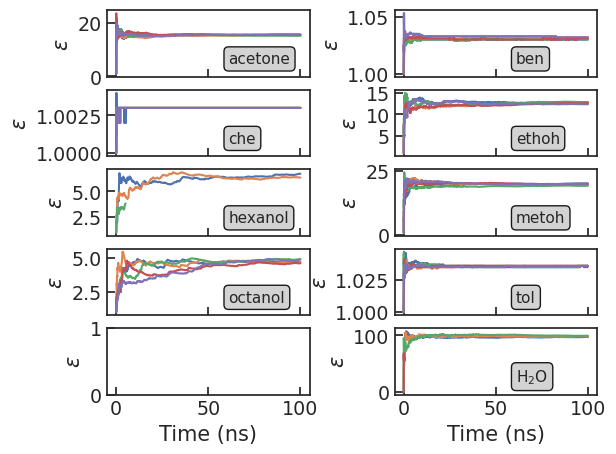

In [13]:
fig, ax = plt.subplots(5,2, sharex=True)
ax = ax.flatten()
solvents = ['acetone', 'ben', 'che', 'ethoh', 'hexanol', 'metoh', 'octanol', 'tol']
for i,sol in enumerate(solvents):
    eps = []
    for b in range(5):
        try: 
            filename = "../analysis/%s_n500_npt_dip_eps_b%i.xvg"%(sol, b)
            data = np.loadtxt(filename, comments=["#", "@"])
            ax[i].plot((data[:,0]-data[0,0])*1e-3, data[:,1], label='%s'%sol)
            eps.append(data[-1,1])
        except FileNotFoundError as e:
            try:
                filename = "../analysis/%s_n1000_npt_dip_eps_b%i.xvg"%(sol, b)
                data = np.loadtxt(filename, comments=["#", "@"])
                ax[i].plot((data[:,0]-data[0,0])*1e-3, data[:,1], label='%s'%sol)
                eps.append(data[-1,1])
            except FileNotFoundError as e:
                #print (e)
                pass
            except IndexError as e:
                pass
                #print (e)
        except IndexError as e:
            pass 
            #print (e)
    print ("%10s : %.2f %.2f"%(sol, np.mean(eps), np.std(eps)))

    ax[i].text(0.6,0.2, sol, fontsize=11, transform=ax[i].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

filename = "../analysis/h2o_box_npt_dip_eps_b%i.xvg"
for b in range(5):
    try:
        data = np.loadtxt(filename%b, comments=["#", "@"])
        ax[-1].plot((data[:,0]-data[0,0])*1e-3, data[:,1], label='H$_2$O')
    except IndexError as e:
        print (e)
ax[-1].text(0.6,0.2, "H$_2$O", fontsize=11, transform=ax[-1].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
#ax[-1].set_ylim(-135000,-0)
ax[-1].set_xlabel('Time (ns)'); ax[-2].set_xlabel('Time (ns)')
[ax[i].set_ylabel(r'$\varepsilon$') for i in range(10)]

plt.tight_layout(h_pad=0, w_pad=0)

### GSY / GSF condensates

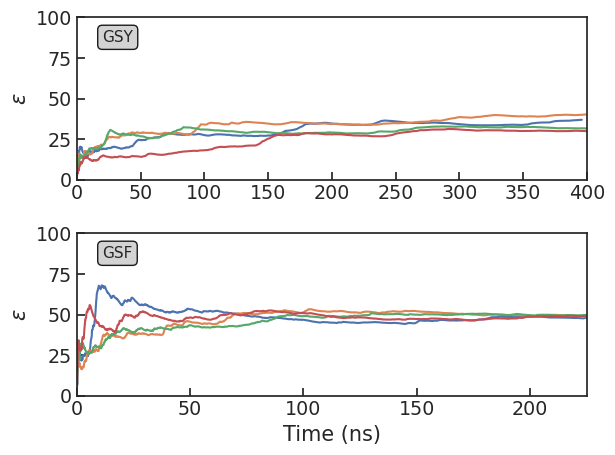

In [20]:
fig, ax = plt.subplots(2,1, sharex=False, sharey=True)
eps_soups = []
soup = "soup"
eps = []
for i in [0,1, 4, 5]:
    froot = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_dense_rep%i_npt_dip_eps.xvg"
    filename = froot%(soup,i)
    data = np.loadtxt(filename, comments=["#", "@"])
    ax[0].plot((data[:,0] - data[0,0])*1e-3, data[:,1])
    eps.append(data[-1,1])
eps_soups.append([np.mean(eps), np.std(eps)])
ax[0].set_xlim(0,400)

soup = "soupF"
froot = "../analysis/%s_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_dip_eps_b%i.xvg"

eps = []
for b in range(4):
    filename = (froot%(soup,b))
    data = np.loadtxt(filename, comments=["#", "@"])
    ax[1].plot((data[:,0] - data[0,0])*1e-3, data[:,1])
    eps.append(data[-1,1])
eps_soups.append([np.mean(eps), np.std(eps)])

ax[0].text(0.05,0.85, "GSY", fontsize=11, transform=ax[0].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
ax[1].text(0.05,0.85, "GSF", fontsize=11, transform=ax[1].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
#ax[-1].set_ylim(-135000,-0)
ax[-1].set_xlim(0,225)
ax[-1].set_ylim(0,100)
ax[-1].set_xlabel('Time (ns)')
ax[0].set_ylabel(r'$\varepsilon$')
ax[1].set_ylabel(r'$\varepsilon$')
plt.tight_layout()
plt.savefig("figures/eps_soups_rev.png", dpi=300, transparent=True)

In [21]:
eps_soups

[[34.817499999999995, 4.383037616767622], [48.825, 0.5675605694549264]]